In [1]:
# def imp_lib():

# imp_lib()
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [8]:
wd='C:/Users/sumen/Downloads/Final_Project/Dataset'

In [11]:
#! pip install mediapipe

  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/cc/d8/c77d3f50bf59e28dd1d82ac5a07770a806522848227f7f00d932b34862bf/mediapipe-0.10.5-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  Obtaining dependency information for flatbuffers>=2.0 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/81/3c/bbb3ceee9fbefc505f98c24dafda68c7b3c4f83b6951c0712b4623fe4cce/opencv_contrib_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sumen\\anaconda3\\envs\\hand\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [9]:
#! pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/7a/94/a1615bac6706eb8a58fe08675b80a11b5463ef9591176dd3e57257495774/matplotlib-3.8.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/55/14/0dc1884e3c04f9b073a47283f5d424926644250891db392a07c56f05e5c5/contourpy-1.1.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/08/65/8c3c09f2fa948b0a4dabecccb5edaa1d97f0d564f00f638ba0a7c4561274/fonttools-4.43.1-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ------------------------------ ------- 122.9/155.5 kB 3.6 MB/s e

In [7]:
#! pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Obtaining dependency information for numpy>=1.21.2 from https://files.pythonhosted.org/packages/cc/05/ef9fc04adda45d537619ea956bc33489f50a46badc949c4280d8309185ec/numpy-1.26.0-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ---------------------------------------- 61.1/61.1 kB 1.6 MB/s eta 0:00:00
Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl (38.1 MB)
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.8 MB 656.4 kB/s eta 0:00:24
   ---------------------------------------- 0.

In [9]:
def data_map(wod):
    os.chdir(wod)
    labelmap={}
    labels=[]
    actions=[]
    act_vid={}
    for i in os.listdir(os.getcwd()):
        labels.append(i)
        action=os.listdir(os.path.join(wd,i))
        actions.extend(action)
        labelmap[i]=action
        for j in os.listdir(os.path.join(os.getcwd(),i)):
            act_vid[j]=os.listdir(os.path.join(os.getcwd(),i,j))
    return(labelmap,labels,actions,act_vid)

#data_map(wd)

In [5]:
def medpipe_import():
    mp_holistic = mp.solutions.holistic # Holistic model
    mp_drawing = mp.solutions.drawing_utils # Drawing utilities

medpipe_import()

In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities


In [7]:
def mediapipe_detection(image, model):
    if(image is not None):
        cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        return
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

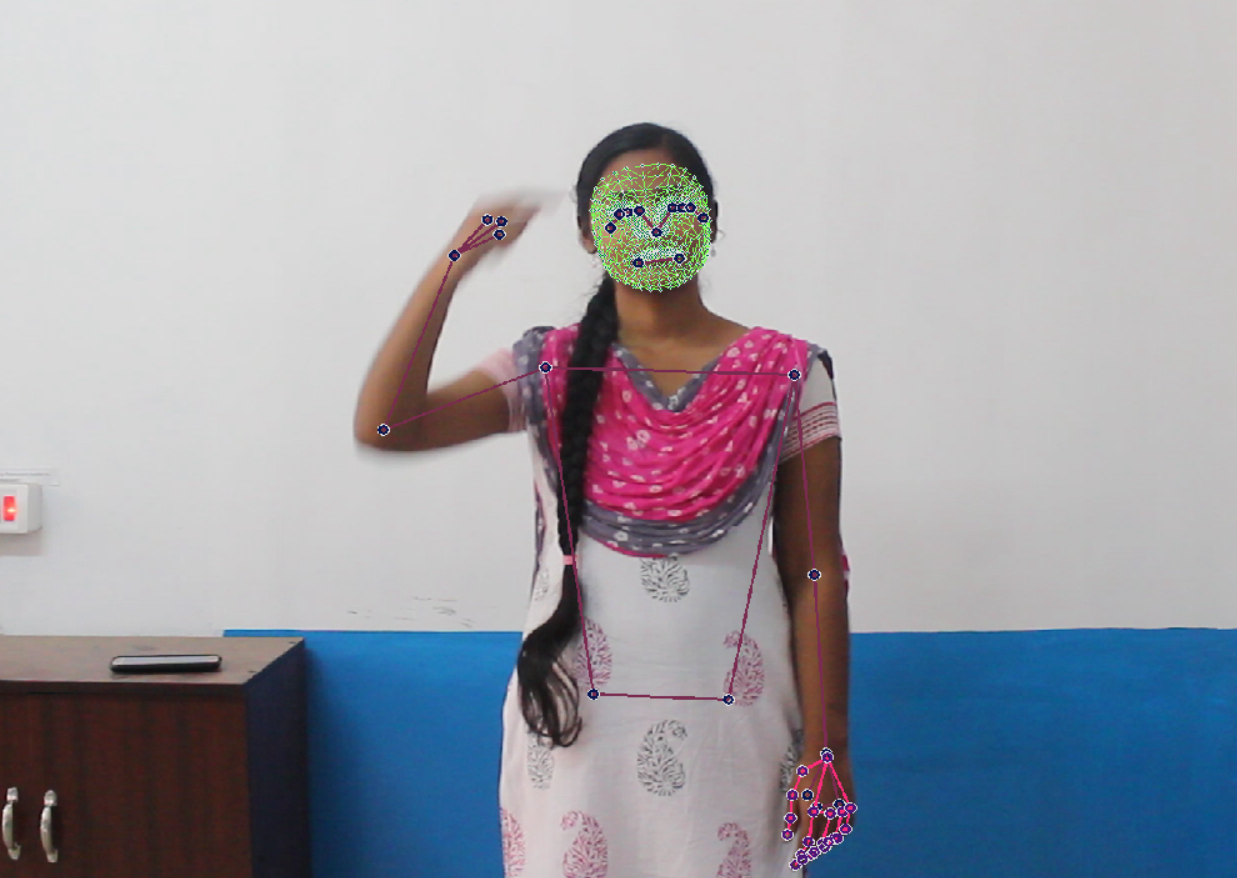

In [9]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    print(len(pose),len(face),len(lh),len(rh))
    return np.concatenate([pose, face, lh, rh])

### Creating Directories for preprocesed Data 

In [60]:
# Path for exported data, numpy arrays

import os
DATA_PATH = 'C:\\Users\\sumen\\Downloads\\Final_Project\\dataset_preprocess'
wd='C:\\Users\\sumen\\Downloads\\Final_Project\\Dataset'
real_path='C:\\Users\\sumen\\Downloads\\Final_Project'
os.chdir(wd)

# Actions that we try to detect
labelmap,label,actions,actvid=data_map(wd)
# actions = np.array([i for i in os.listdir('C:\\Msc DS\\SignLanguageDetection\\Adjectives')])
#print(actions)

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30



In [62]:
actvid

{'alive': ['MVI_9703 - Copy (2).MOV',
  'MVI_9703 - Copy (3).MOV',
  'MVI_9703 - Copy.MOV',
  'MVI_9703.MOV',
  'MVI_9704 - Copy (2).MOV',
  'MVI_9704 - Copy (3).MOV',
  'MVI_9704 - Copy.MOV',
  'MVI_9704.MOV',
  'MVI_9705 - Copy (2).MOV',
  'MVI_9705 - Copy (3).MOV',
  'MVI_9705 - Copy.MOV',
  'MVI_9705.MOV',
  'MVI_9706 - Copy (2).MOV',
  'MVI_9706 - Copy (3).MOV',
  'MVI_9706 - Copy.MOV',
  'MVI_9706.MOV',
  'MVI_9827 - Copy (2).MOV',
  'MVI_9827 - Copy (3).MOV',
  'MVI_9827 - Copy.MOV',
  'MVI_9827.MOV',
  'MVI_9828 - Copy (2).MOV',
  'MVI_9828 - Copy.MOV',
  'MVI_9828.MOV',
  'MVI_9829 - Copy (2).MOV',
  'MVI_9829 - Copy.MOV',
  'MVI_9829.MOV',
  'MVI_9830 - Copy (2).MOV',
  'MVI_9830 - Copy (3).MOV',
  'MVI_9830 - Copy.MOV',
  'MVI_9830.MOV'],
 'bad': ['MVI_5161.MOV',
  'MVI_5162.MOV',
  'MVI_5163.MOV',
  'MVI_5241.MOV',
  'MVI_5242.MOV',
  'MVI_5243.MOV',
  'MVI_5319 - Copy.MOV',
  'MVI_5319.MOV',
  'MVI_5320 - Copy.MOV',
  'MVI_5320.MOV',
  'MVI_5321 - Copy.MOV',
  'MVI_5321.MO

In [63]:
labelmap

{'Adjectives': ['alive',
  'bad',
  'Beautiful',
  'big large',
  'Blind',
  'cheap',
  'clean',
  'cold',
  'cool',
  'curved',
  'dead',
  'Deaf',
  'deep',
  'dirty',
  'dry',
  'expensive',
  'famous',
  'fast',
  'female',
  'flat',
  'good',
  'happy',
  'hard',
  'healthy',
  'heavy',
  'high',
  'hot',
  'light',
  'long',
  'loose',
  'loud',
  'low',
  'male',
  'Mean',
  'narrow',
  'new',
  'Nice',
  'old',
  'poor',
  'quiet',
  'rich',
  'sad',
  'shallow',
  'short',
  'sick',
  'slow',
  'small little',
  'soft',
  'strong',
  'tall',
  'thick',
  'tight',
  'Ugly',
  'warm',
  'weak',
  'wet',
  'wide',
  'young'],
 'Animals': ['Animal', 'Bird', 'Cat', 'Cow', 'Dog', 'Fish', 'Horse', 'Mouse'],
 'Clothes': ['Clothing',
  'Dress',
  'Hat',
  'Pant',
  'Pocket',
  'Shirt',
  'Shoes',
  'Skirt',
  'Suit',
  'T-Shirt'],
 'Colors': ['Black',
  'Blue',
  'Brown',
  'Colour',
  'Green',
  'Grey',
  'Orange',
  'Pink',
  'Red',
  'White',
  'Yellow'],
 'Day_and_time': ['Afternoo

In [11]:
def make_dirs(actions):
    for action in actions: 
        for sequence in range(1,no_sequences+1):
            try: 
                os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            except:
                pass
make_dirs(actions)

In [37]:
path=os.path.join('C:\\Users\\sumen\\Downloads\\Final_Project\\Dataset')
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for labb in labelmap.keys():
        for actt in labelmap[labb]:
            apath=os.path.join(path,labb,actt)
            os.chdir(apath)
            for i,j in enumerate(actvid[actt]):
                os.chdir(apath)
                #print(apath)
                vid_num=i+1
                vid=j
                # print(vid)
                # print(vid_num,"vid num")
                # print(sequence_length)
                cap = cv2.VideoCapture(vid)
                for frame_num in range(sequence_length):
                    # print(frame_num)
                    # Read feed
                    # cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
                    ret, frame = cap.read() 
                    image, results = mediapipe_detection(frame, holistic)
                    draw_styled_landmarks(image, results)
                    os.chdir(real_path)
                    # print(os.getcwd())
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, actt, str(vid_num), str(frame_num))
                    # print(npy_path)
                    np.save(npy_path, keypoints)
                    # print("---end of oframe---")
                    # if sequence==30:
                        
        
                        # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                            break
    cap.release()
    cv2.destroyAllWindows()
            
            

Science
132 1404 63 63
C:\Users\sumen\Downloads\Final_Project\dataset_preprocess\Science\1\0
132 1404 63 63
C:\Users\sumen\Downloads\Final_Project\dataset_preprocess\Science\1\1
132 1404 63 63
C:\Users\sumen\Downloads\Final_Project\dataset_preprocess\Science\1\2
132 1404 63 63
C:\Users\sumen\Downloads\Final_Project\dataset_preprocess\Science\1\3
132 1404 63 63
C:\Users\sumen\Downloads\Final_Project\dataset_preprocess\Science\1\4
132 1404 63 63
C:\Users\sumen\Downloads\Final_Project\dataset_preprocess\Science\1\5
132 1404 63 63
C:\Users\sumen\Downloads\Final_Project\dataset_preprocess\Science\1\6
132 1404 63 63
C:\Users\sumen\Downloads\Final_Project\dataset_preprocess\Science\1\7
132 1404 63 63
C:\Users\sumen\Downloads\Final_Project\dataset_preprocess\Science\1\8
132 1404 63 63
C:\Users\sumen\Downloads\Final_Project\dataset_preprocess\Science\1\9
132 1404 63 63
C:\Users\sumen\Downloads\Final_Project\dataset_preprocess\Science\1\10
132 1404 63 63
C:\Users\sumen\Downloads\Final_Project\da

## Create Lables and preprocessing

In [41]:
#! pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/1c/c3/17c6aa1dd5bc8cea5bf00d0c3a021a5dd1680c250861cc877a7e556e4b9b/tensorflow-2.14.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/cb/90/599c79a248dcae6935331113649de5d75427e320efde21b583648b498584/tensorflow_intel-2.14.0-cp310-cp310-win_amd64.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/e2/c4/6f8dae1530d57a6122fd5b72c750187484acbe612f630cb2179e4bcb12c1/h5py-3.9.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/02/8c/dc970bc00867fe290e8c8a7befa1635af716a9ebdfe3fb9dce0ca4b522ce/li

In [64]:
label_map = {label:num for num, label in enumerate(actions)}

In [65]:
label_map
label1_map={label:num for num, label in enumerate(labelmap)}

In [66]:
sequences, labels,label1 = [], [] ,[]
for action in actions:
   # print(action)
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        for kk,vv in labelmap.items():
            if action in vv:
                label1.append(label1_map[kk])

In [67]:
np.array(sequences).shape

(7740, 30, 1662)

In [68]:
np.array(labels).shape

(7740,)

In [69]:
X = np.array(sequences)

In [70]:
X.shape


(7740, 30, 1662)

In [72]:
lables.shape

(7740, 258)

In [73]:
os.chdir('C:\\Users\\sumen\\Downloads\\Final_Project\\dataset_final')
np.save('sequences',sequences)
np.save('labels',labels)
np.save('label1',label1)